In [1]:
import rebound as rb
import celmech as cm
import sympy as sp
import numpy as np

In [61]:
from matplotlib import pyplot as plt

In [2]:
from celmech.secular import LaplaceLagrangeSystem, SecularSystemSimulation

In [3]:
sim=rb.Simulation("full.sim")
terr_sim=rb.Simulation()
terr_sim.units = sim.units
for p in sim.particles[:5]:
    terr_sim.add(p.copy())
terr_sim.move_to_com()

In [4]:
ll = cm.secular.LaplaceLagrangeSystem.from_Simulation(terr_sim)

In [5]:
secsim = SecularSystemSimulation.from_Simulation(
    terr_sim,
    max_order=6,
    method='RK',
    dtFraction=0.05,
    rk_kwargs={'rk_method':'GL6'}
)
secsim._integrator.atol = 1e-5*np.sqrt(secsim.calculate_AMD())

In [83]:
pvars = cm.Poincare.from_Simulation(terr_sim)
pham=cm.PoincareHamiltonian(pvars)
for i in range(1,5):
    for j in range(i+1,5):
        pham.add_secular_terms(2,4,indexIn=i,indexOut=j)
    

In [84]:
_=pham.N_H
pham._integrator.set_integrator('vode',
                                method='adams',
                                rtol=secsim._integrator.rtol,
                                atol=secsim._integrator.atol
                               )

In [94]:
(5e9/15e6)  * 4.74 / 60

26.333333333333332

In [95]:
%%time
e = np.zeros(2000)
times= pham.t + np.linspace(0,15e7,2000)
tdone = np.zeros(2000)
for i,t in enumerate(times):
    pham.integrate(t)
    e[i] = pham.particles[1].e
    tdone[i] = pham.t

CPU times: user 46.8 s, sys: 244 ms, total: 47.1 s
Wall time: 47.5 s


In [100]:
pham.t

180000000.0

In [99]:
47.5 * (5e9/15e7) / 60

26.388888888888893

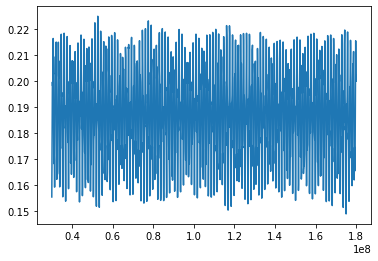

In [96]:
plt.plot(times,e)

In [80]:
pham.integrate(1e7)

/Users/shadden/anaconda/envs/celmech/lib/python3.9/site-packages/scipy/integrate/_ode.py:1013: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


In [82]:
pham._integrator.jac

<function celmech.hamiltonian.Hamiltonian._update.<locals>.<lambda>(t, y)>

In [81]:
pham.t

6684504.983846611

In [102]:
secsim.t

5000719.760422223

In [103]:
%%time
secsim.integrate(5e7)

CPU times: user 42 s, sys: 238 ms, total: 42.2 s
Wall time: 42.6 s


In [104]:
secsim.t/5e6

10.000427229394967